In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [2]:
y_train = train.iloc[:,1] #正解ラベルの用意
train = train.drop('Survived',axis=1)
df = pd.concat([train,test])

In [6]:
df.shape

(1309, 11)

In [7]:
df.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [8]:
df = df.drop('Ticket',axis=1).drop('Cabin',axis=1)
df["Embarked"].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [9]:
df["Embarked"].fillna("S",inplace=True)
df["Fare"].fillna(df.Fare.mean(), inplace=True)

In [10]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


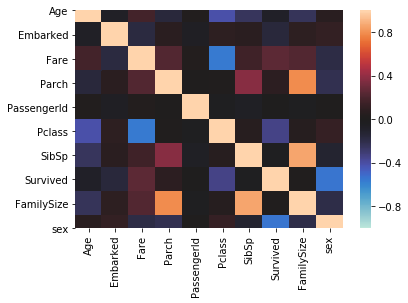

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

df2 = pd.concat([train,test],sort=True)

df2 = df2.drop('Ticket',axis=1).drop('Cabin',axis=1)
df2["Embarked"].fillna("S",inplace=True)
df2["Fare"].fillna(df2.Fare.mean(), inplace=True)
df2['FamilySize'] = df2['SibSp'] + df2['Parch'] + 1

emb_dum = pd.get_dummies(df2['Embarked'])
df2 = pd.concat((df2,emb_dum),axis=1)

df2["Embarked"] = df2['S']
df2 = df2.drop(['C', 'Q', 'S'],axis=1)

sex_dum = pd.get_dummies(df2['Sex'])
df2 = pd.concat((df2, sex_dum),axis=1)

df2["sex"] = df2.male
df2 = df2.drop('female',axis=1)
df2 = df2.drop('male',axis=1)

corr_mat = df2.corr()
sns.heatmap(corr_mat,
            vmin=-1.0,
            vmax=1.0,
            center=0,
            fmt='.1f',
            xticklabels=corr_mat.columns.values,
            yticklabels=corr_mat.columns.values
           )
plt.show()

In [13]:
# 性別(sex)と乗船場所(enmark)のデータはダミー変数を作成する
# まずはsexから、性別のdummy変数を作成する
sex_dum = pd.get_dummies(df['Sex'])
# データの連結をする
df = pd.concat((df,sex_dum),axis=1)
# データからsexの列を取り除く
df = df.drop('Sex',axis=1)
# 性別は男か女かのみなので男なら1というデータのみあればよい
df = df.drop('female',axis=1)

# 乗船場所でも同様
emb_dum = pd.get_dummies(df['Embarked'])
df = pd.concat((df,emb_dum),axis=1)
df = df.drop('Embarked',axis=1)
df = df.drop('S',axis=1)

In [14]:
df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Age            263
SibSp            0
Parch            0
Fare             0
male             0
C                0
Q                0
dtype: int64

In [15]:
df.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Fare,male,C,Q
0,1,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,1,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,0,1,0
2,3,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,0,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,0,0,0
4,5,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,1,0,0


In [16]:
def name_classifier(name_df):    
    name_class_df = pd.DataFrame(columns={'miss','mrs','master','mr'})

    for name in name_df:        
        if 'Miss' in name:
            df = pd.DataFrame([[1,0,0,0]],columns={'miss','mrs','master','mr'})
        elif 'Mrs' in name:
            df = pd.DataFrame([[0,1,0,0]],columns={'miss','mrs','master','mr'})
        elif 'Master' in name:
            df = pd.DataFrame([[0,0,1,0]],columns={'miss','mrs','master','mr'})
        elif 'Mr' in name:
            df = pd.DataFrame([[0,0,0,1]],columns={'miss','mrs','master','mr'})
        else :
            df = pd.DataFrame([[0,0,0,0]],columns={'miss','mrs','master','mr'})
        name_class_df = name_class_df.append(df,ignore_index=True)        
    return name_class_df

In [17]:
name = df.iloc[:,2]
name_class = name_classifier(name)

In [18]:
name_class.head()

,mrs,mr,miss,master
0,0,0,0,1
1,0,1,0,0
2,1,0,0,0
3,0,1,0,0
4,0,0,0,1


In [19]:
def ave_age(df,df_name):
    miss=0
    mrs=0
    master=0
    mr=0
    c_miss=0
    c_mrs=0
    c_master=0
    c_mr=0
    for i in range(1309):
        if df.isnull().iloc[i,3]==False:
            if df_name.iloc[i,0]==1:
                miss=miss+df.iloc[i,3]
                c_miss=c_miss+1
            if df_name.iloc[i,1]==1:
                mrs=mrs+df.iloc[i,3]
                c_mrs=c_mrs+1
            if df_name.iloc[i,2]==1:
                master=master+df.iloc[i,3]
                c_master=c_master+1
            if df_name.iloc[i,3]==1:
                mr=mr+df.iloc[i,3]
                c_mr=c_mr+1
    return [miss/c_miss,mrs/c_mrs,master/c_master,mr/c_mr]

In [20]:
print(ave_age(df,name_class))

[21.774238095238097, 36.98255813953488, 5.482641509433963, 32.28092783505155]


In [21]:
for i in range(1309):
    if df.isnull().iloc[i,3]==True:
        if name_class.iloc[i,0]==1:
            df.iloc[i,3]=21.8
        elif name_class.iloc[i,1]==1:
            df.iloc[i,3]=37
        elif name_class.iloc[i,2]==1:
            df.iloc[i,3]=5.5
        if name_class.iloc[i,3]==1:
            df.iloc[i,3]=32.3

In [22]:
df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Age            2
SibSp          0
Parch          0
Fare           0
male           0
C              0
Q              0
dtype: int64

In [23]:
df['Age'].fillna(df['Age'].median(),inplace=True)
df=df.drop('Name',axis=1)

# モデルの学習

In [24]:
train_data=df.iloc[0:891,:]
test_data=df.iloc[891:,:]

id_test=test_data.iloc[:,0] #提出用データに必要です

x_train=train_data.drop('PassengerId',axis=1)
x_test=test_data.drop('PassengerId',axis=1)

# グリッドサーチ

In [25]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()

from sklearn.model_selection import GridSearchCV
param = {'n_estimators':[10,100,500,1000],'max_depth':[3,6,12],'criterion':['gini','entropy'],'random_state':[7]}
grid_forest = GridSearchCV(forest,param) #defaultではcv=3なのでデータを3つに分け、3回交差検証が行われます
grid_forest.fit(x_train,y_train)

C:\Users\haruk\Anaconda3\envs\ai-gpu\Lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
           

In [27]:
grid_forest.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'n_estimators': 1000,
 'random_state': 7}

In [28]:
best_forest=RandomForestClassifier(max_depth= 6, n_estimators=1000, criterion='entropy',random_state=7)
best_forest.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

# 提出用データ

In [29]:
result = np.array(best_forest.predict(x_test))
df_result=pd.DataFrame(result,columns=['Survived'])
df_result=pd.concat([id_test,df_result],axis=1)
df_result['Survived'] = np.array(round(df_result['Survived']), dtype='int')
df_result.to_csv('reult.csv', index=False)